In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set_palette("Set2")
%matplotlib inline

In [2]:
data = pd.read_csv("medoutcon.csv")
data

,estimator,n_samples,direct_effect,indirect_effect
0,one-step,100,6.01,8.63
1,one-step,200,16.83,16.40
2,one-step,500,53.67,49.75
3,one-step,1000,167.16,100.31
4,TMLE,100,6.78,8.63
5,TMLE,200,15.05,15.73
6,TMLE,500,62.46,49.16
7,TMLE,1000,105.70,107.15


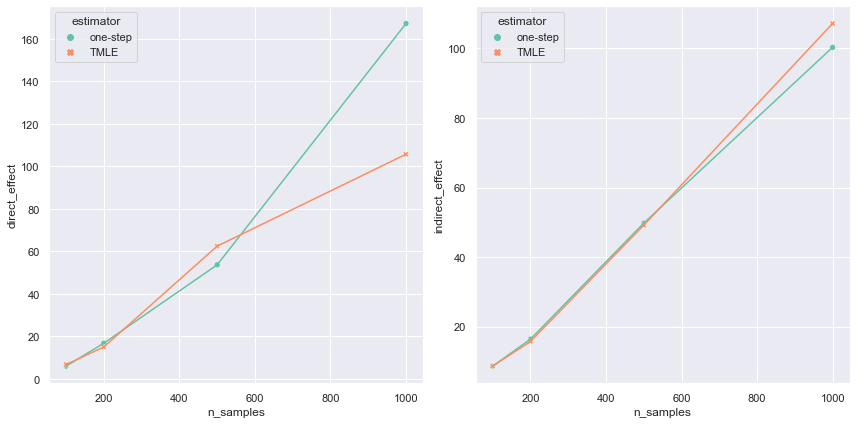

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1 = sns.lineplot(x="n_samples", y="direct_effect", data=data,
                   ci=None, hue="estimator", legend=False, ax=ax1)
ax1 = sns.scatterplot(x="n_samples", y="direct_effect", data=data,
                      hue="estimator", style="estimator", ax=ax1)
ax2 = sns.lineplot(x="n_samples", y="indirect_effect", data=data,
                   ci=None, hue="estimator", legend=False, ax=ax2)
ax2 = sns.scatterplot(x="n_samples", y="indirect_effect", data=data,
                      hue="estimator", style="estimator", ax=ax2)
fig.tight_layout()
plt.show()

In [4]:
data = pd.read_csv("iptw_gcomp.csv")
data

,estimator,n_samples,duration
0,IPTW,100,13.81
1,IPTW,200,26.91
2,IPTW,500,68.42
3,IPTW,1000,140.54
4,g-computation,100,12.28
5,g-computation,200,24.58
6,g-computation,500,61.42
7,g-computation,1000,121.49


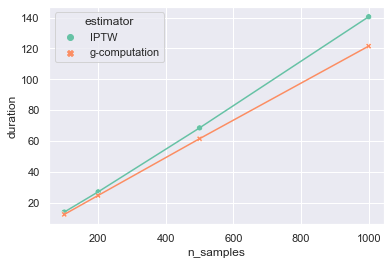

In [6]:
sns.lineplot(x="n_samples", y="duration", data=data,
             ci=None, hue="estimator", legend=False)
sns.scatterplot(x="n_samples", y="duration", data=data,
                hue="estimator", style="estimator")
plt.show()

In [7]:
data = pd.read_csv("medoutcon_all.csv")
data

,effect,estimator,learner,n_sim,duration,bias,variance,std,std_bias,mse,av_est_std,coverage
0,direct,one-step,glm_fast,100,28,0.000686,0.000277,0.016658,0.041204,0.000278,0.015396,0.940
1,direct,one-step,glm_fast,200,66,-0.000449,0.000270,0.016439,-0.027340,0.000270,0.015402,0.945
2,direct,one-step,hal,100,60,0.000683,0.000271,0.016460,0.041477,0.000271,0.015357,0.940
3,direct,one-step,hal,200,127,-0.000470,0.000273,0.016514,-0.028443,0.000273,0.015373,0.935
4,direct,TMLE,glm_fast,100,28,-0.009549,0.000393,0.019825,-0.481666,0.000484,0.015379,0.810
5,direct,TMLE,glm_fast,200,66,-0.009864,0.000382,0.019551,-0.504509,0.000480,0.015398,0.835
6,direct,TMLE,hal,100,60,-0.009259,0.000378,0.019440,-0.476309,0.000464,0.015350,0.860
7,direct,TMLE,hal,200,127,-0.009921,0.000377,0.019424,-0.510779,0.000476,0.015361,0.825
8,indirect,one-step,glm_fast,100,28,0.001189,0.000020,0.004445,0.267591,0.000021,0.004524,0.990
9,indirect,one-step,glm_fast,200,66,0.000730,0.000018,0.004248,0.171785,0.000019,0.004537,0.965


In [11]:
direct_data = data[data["effect"] == "direct"]
direct_data

,effect,estimator,learner,n_sim,duration,bias,variance,std,std_bias,mse,av_est_std,coverage
0,direct,one-step,glm_fast,100,28,0.000686,0.000277,0.016658,0.041204,0.000278,0.015396,0.940
1,direct,one-step,glm_fast,200,66,-0.000449,0.000270,0.016439,-0.027340,0.000270,0.015402,0.945
2,direct,one-step,hal,100,60,0.000683,0.000271,0.016460,0.041477,0.000271,0.015357,0.940
3,direct,one-step,hal,200,127,-0.000470,0.000273,0.016514,-0.028443,0.000273,0.015373,0.935
4,direct,TMLE,glm_fast,100,28,-0.009549,0.000393,0.019825,-0.481666,0.000484,0.015379,0.810
5,direct,TMLE,glm_fast,200,66,-0.009864,0.000382,0.019551,-0.504509,0.000480,0.015398,0.835
6,direct,TMLE,hal,100,60,-0.009259,0.000378,0.019440,-0.476309,0.000464,0.015350,0.860
7,direct,TMLE,hal,200,127,-0.009921,0.000377,0.019424,-0.510779,0.000476,0.015361,0.825


In [24]:
indirect_data = data[data["effect"] == "indirect"]
indirect_data

,effect,estimator,learner,n_sim,duration,bias,variance,std,std_bias,mse,av_est_std,coverage
8,indirect,one-step,glm_fast,100,28,0.001189,0.000020,0.004445,0.267591,0.000021,0.004524,0.990
9,indirect,one-step,glm_fast,200,66,0.000730,0.000018,0.004248,0.171785,0.000019,0.004537,0.965
10,indirect,one-step,hal,100,60,0.001220,0.000019,0.004399,0.277424,0.000021,0.004528,0.910
11,indirect,one-step,hal,200,127,0.000927,0.000017,0.004173,0.222229,0.000018,0.004543,0.980
12,indirect,TMLE,glm_fast,100,28,0.001083,0.000016,0.004061,0.266746,0.000018,0.004351,0.970
13,indirect,TMLE,glm_fast,200,66,0.000809,0.000017,0.004080,0.198184,0.000017,0.004374,0.965
14,indirect,TMLE,hal,100,60,0.001148,0.000017,0.004171,0.275229,0.000019,0.004365,0.960
15,indirect,TMLE,hal,200,127,0.001112,0.000016,0.004020,0.276681,0.000017,0.004374,0.970


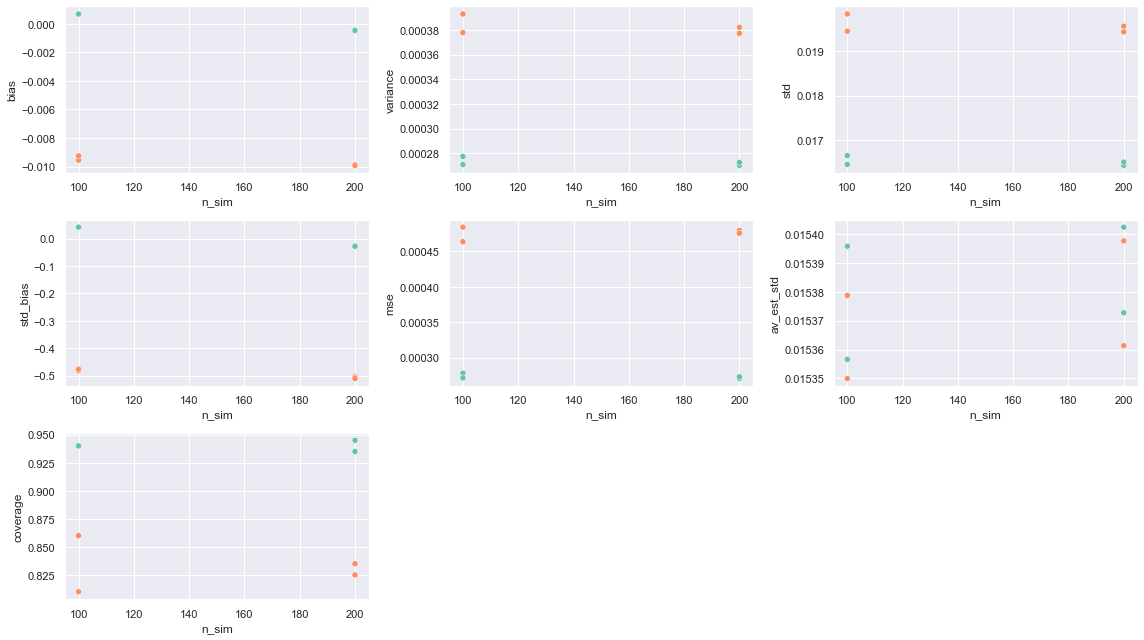

In [75]:
fig = plt.figure(figsize=(16, 9))

for i in range(5, 12):
    feature = direct_data.columns[i]
    ax = plt.subplot(3, 3, i - 4)
    ax = sns.scatterplot(x="n_sim", y=direct_data[feature], data=direct_data,
                         hue="estimator", legend=False)

fig.tight_layout()
plt.show()